## Credit One Task 2- Pipeline - Smitha Palampalli


Updated: 2020.09.15


#### The objective of this task is to perform Exploratory Data Analysis (EDA) on Credit One data to identify features that can be used for modelling and prediction. The EDA will also help understand the data, identify patterns in the data and identify any relationships between the various features, if present.

## Importing Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

## Importing Data

In [5]:
# Import previously pre-processed and cleaned data from task 1 that was saved into a CSV
credit = pd.read_csv('Credit_One_Data.csv')

## Evaluating Data 

In [6]:
credit.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_ID,EDUCATION_ID,MARRIAGE_LABEL,PMT_DEFAULT_IND
0,1,1,20000,female,university,1,24,2,2,-1,...,689,0,0,0,0,default,0,3,Married,0
1,2,2,120000,female,university,2,26,-1,2,0,...,1000,1000,1000,0,2000,default,0,3,Single,0
2,3,3,90000,female,university,2,34,0,0,0,...,1500,1000,1000,1000,5000,not default,0,3,Single,1
3,4,4,50000,female,university,1,37,0,0,0,...,2019,1200,1100,1069,1000,not default,0,3,Married,1
4,5,5,50000,male,university,1,57,-1,0,-1,...,36681,10000,9000,689,679,not default,1,3,Married,1


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  30000 non-null  int64 
 1   ID                          30000 non-null  int64 
 2   LIMIT_BAL                   30000 non-null  int64 
 3   SEX                         30000 non-null  object
 4   EDUCATION                   30000 non-null  object
 5   MARRIAGE                    30000 non-null  int64 
 6   AGE                         30000 non-null  int64 
 7   PAY_0                       30000 non-null  int64 
 8   PAY_2                       30000 non-null  int64 
 9   PAY_3                       30000 non-null  int64 
 10  PAY_4                       30000 non-null  int64 
 11  PAY_5                       30000 non-null  int64 
 12  PAY_6                       30000 non-null  int64 
 13  BILL_AMT1                   30000 non-null  in

## Preprocessing Data

###### Most of the pre - processing was already done in task 1.  There are no nulls or duplicates. Most of the data types are integers.  Refer to C2T1.ipynb for  preprocessing. 
###### There are 2 things I need to do here in preprocessing, since I imported from .csv file : 
 * change the object dtypes to category
 * drop the first column (Called Unnamed: 0) which seems to be the index of the original dataframe. It is not needed for EDA.

###### In addition, I need to discretize age and limit_bal and pay_0 to pay_6

In [8]:
#convert object datatypes to categorical datatypes
credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['default payment next month'] = credit['default payment next month'].astype('category')
credit['MARRIAGE_LABEL'] = credit['MARRIAGE_LABEL'].astype('category')

In [9]:
# what are the column names?
credit.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'SEX_ID', 'EDUCATION_ID',
       'MARRIAGE_LABEL', 'PMT_DEFAULT_IND'],
      dtype='object')

In [10]:
# drop the first 'Unnamed' column
credit = credit.drop(['Unnamed: 0'], axis = 1)

In [11]:
# check for the resulting datatypes
credit.dtypes

ID                               int64
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                         int64
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month    category
SEX_ID                   

###### Discretize Age

In [12]:
# discretize age into 4 intervals and add as a new feature to dataframe
# note by default right = True, which means the right value (the upper limit) is included 
# this means in the bins below, age 30 is included in bin 30-39
# Note that these intervals are not equally spaced. Customer ages range between 21 to 79
credit = credit.assign(age_bins = pd.cut(credit['AGE'], 
                                             bins = [19, 29, 39, 49, 80] , 
                                             labels = ['20-29', '30-39', '40-49', '50 and above']
                                            ))

###### Discretize limit_bal

In [13]:
# discretize balance into 4 intervals and add as a new feature to dataframe
# Note that these intervals are not equally spaced.
credit = credit.assign(limit_bal_bins = pd.cut(credit['LIMIT_BAL'], 
                                             bins = [0, 200000, 400000, 600000, 1100000] , 
                                             labels = ['below $200K', '$200K to 400K', '$400K to 600K', '$600K and above']
                                            ))

In [14]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  int64   
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  int64   
 7   PAY_2                       30000 non-null  int64   
 8   PAY_3                       30000 non-null  int64   
 9   PAY_4                       30000 non-null  int64   
 10  PAY_5                       30000 non-null  int64   
 11  PAY_6                       30000 non-null  int64   
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

###### Discretize PAY_0, PAY_2, PAY_3, PAY_4, PAY_5 and PAY_6 into payment made or delayed. -1, -2 and 0 will be considered as Payment made. 1 through 8 will be considered payment defaulted

In [15]:
# discretize PAY_0 into 2 intervals and add as a new feature to dataframe. 0 - not default, 1 - default
# note by default right = True, which means the right value (the upper limit) is included 
# this means in the bins below, 0 is included in -3 to 0, and 1 is included in 1 through 10
# Note that these intervals are not equally spaced.
credit = credit.assign(PAY_0_default = pd.cut(credit['PAY_0'], 
                                             bins = [-3, 0, 10] , 
                                             labels = ['0', '1']
                                            ))
credit = credit.assign(PAY_2_default = pd.cut(credit['PAY_2'], 
                                             bins = [-3, 0, 10] , 
                                             labels = ['0', '1']
                                            ))
credit = credit.assign(PAY_3_default = pd.cut(credit['PAY_3'], 
                                             bins = [-3, 0, 10] , 
                                             labels = ['0', '1']
                                            ))
credit = credit.assign(PAY_4_default = pd.cut(credit['PAY_4'], 
                                             bins = [-3, 0, 10] , 
                                             labels = ['0', '1']
                                            ))
credit = credit.assign(PAY_5_default = pd.cut(credit['PAY_5'], 
                                             bins = [-3, 0, 10] , 
                                             labels = ['0', '1']
                                            ))
credit = credit.assign(PAY_6_default = pd.cut(credit['PAY_6'], 
                                             bins = [-3, 0, 10] , 
                                             labels = ['0', '1']
                                            ))

In [16]:
# ensure no nulls are present after discretization
credit.isnull().any().sum()

0

In [17]:
# take a peek at the dataset after discretizing
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  int64   
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  int64   
 7   PAY_2                       30000 non-null  int64   
 8   PAY_3                       30000 non-null  int64   
 9   PAY_4                       30000 non-null  int64   
 10  PAY_5                       30000 non-null  int64   
 11  PAY_6                       30000 non-null  int64   
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

In [18]:
credit.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,MARRIAGE_LABEL,PMT_DEFAULT_IND,age_bins,limit_bal_bins,PAY_0_default,PAY_2_default,PAY_3_default,PAY_4_default,PAY_5_default,PAY_6_default
0,1,20000,female,university,1,24,2,2,-1,-1,...,Married,0,20-29,below $200K,1,1,0,0,0,0
1,2,120000,female,university,2,26,-1,2,0,0,...,Single,0,20-29,below $200K,0,1,0,0,0,1
2,3,90000,female,university,2,34,0,0,0,0,...,Single,1,30-39,below $200K,0,0,0,0,0,0
3,4,50000,female,university,1,37,0,0,0,0,...,Married,1,30-39,below $200K,0,0,0,0,0,0
4,5,50000,male,university,1,57,-1,0,-1,0,...,Married,1,50 and above,below $200K,0,0,0,0,0,0
5,6,50000,male,graduate school,2,37,0,0,0,0,...,Single,1,30-39,below $200K,0,0,0,0,0,0
6,7,500000,male,graduate school,2,29,0,0,0,0,...,Single,1,20-29,$400K to 600K,0,0,0,0,0,0
7,8,100000,female,university,2,23,0,-1,-1,0,...,Single,1,20-29,below $200K,0,0,0,0,0,0
8,9,140000,female,high school,1,28,0,0,2,0,...,Married,1,20-29,below $200K,0,0,1,0,0,0
9,10,20000,male,high school,2,35,-2,-2,-2,-2,...,Single,1,30-39,below $200K,0,0,0,0,0,0


###### Export into excel to use for next task (modelling)

In [19]:
#export the data to a comma separated value file
credit.to_csv('Credit_One_Data_After_T2.csv')

## Exploratory Data Analysis

In [20]:
credit.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_ID,EDUCATION_ID,PMT_DEFAULT_IND
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.396267,1.598100,0.778800
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.489129,1.371656,0.415062
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,1.000000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,1.000000,1.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,1.000000,3.000000,1.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,3.000000,1.000000


In [21]:
# Using Pandas Profiling to get a HTML summary of some basic statistal analysis and visualizations 
# of each of the features
# note this takes about 3 minc to run, hence commenting it. It runs perfectly well though.

#pandas_profiling.ProfileReport(credit)

### Statistical Analysis and Visuaizations

#### Run Univariate and Bivariate analysis for each of the features, one by one. This will help get me familiar with each feature, as well as help to see if it has any significant relationship with other features that can be used during modelling. With bivariate analysis, check the relationship of each feature with dependent 'default' variable, or with other features.

#### Feature: LIMIT_BAL and limit_bal_bins

###### Check its min, max, mean values

In [22]:
credit.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

###### Histogram

(array([1.2498e+04, 7.8800e+03, 5.0590e+03, 2.7590e+03, 1.5980e+03,
        1.2700e+02, 5.6000e+01, 2.2000e+01, 0.0000e+00, 1.0000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <a list of 10 Patch objects>)

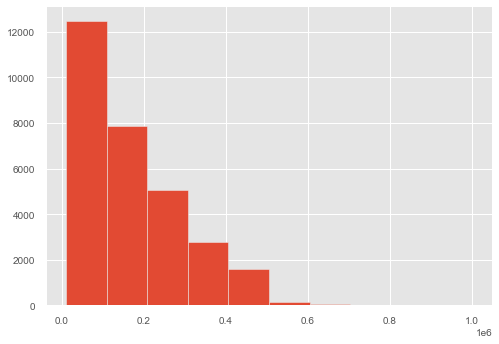

In [23]:
# plot a histogram of the balance limit
plt.style.use('ggplot')
plt.hist(credit['LIMIT_BAL'])

###### See how balance is distributed using SNS distplot

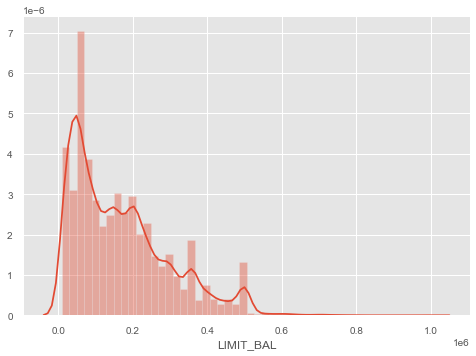

In [24]:
sns.distplot(credit['LIMIT_BAL'])

###### How is balance distributed across gender - we see a fairly similar distribution across gender

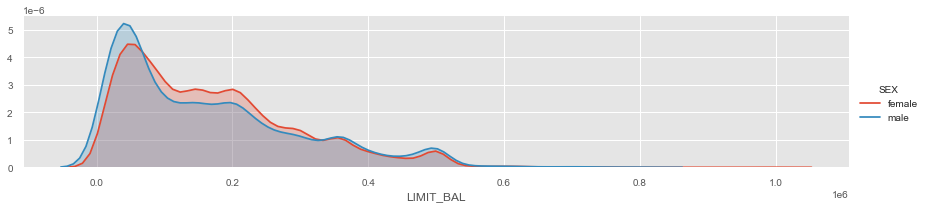

In [25]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
fig.add_legend()

###### Draw a box plot between Balance and default_ind to see if there is any relationship
###### From the Boxplot below, we can see that if the balance is higher, there is a slightly lower chance of defaulting

[Text(0, 0, '0'),
 Text(0, 0, '$0'),
 Text(0, 0, '$200000'),
 Text(0, 0, '$400000'),
 Text(0, 0, '$600000'),
 Text(0, 0, '$800000'),
 Text(0, 0, '$1000000')]

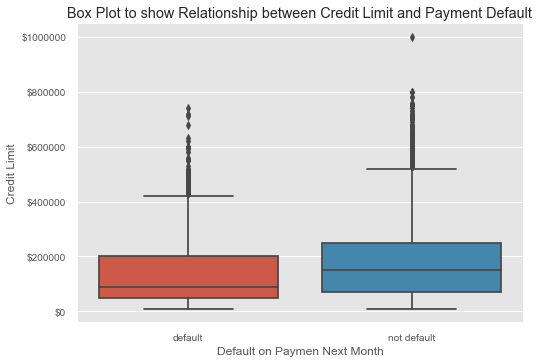

In [26]:
fg = sns.boxplot(credit['default payment next month'], credit['LIMIT_BAL'])
fg.set(xlabel = 'Default on Paymen Next Month', ylabel = 'Credit Limit')
fg.set (title = 'Box Plot to show Relationship between Credit Limit and Payment Default')
fg.yaxis.set_ticklabels([0, '$0', '$200000', '$400000', '$600000', '$800000', '$1000000'])

In [27]:
print(fg.xaxis.get_ticklabels())

<a list of 2 Text major ticklabel objects>


###### Draw a catplot between discretized limit bal and payment default

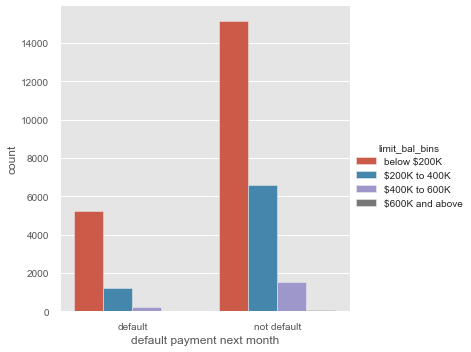

In [28]:
sns.catplot('default payment next month', data = credit, hue = 'limit_bal_bins', kind = 'count')

###### Create a pivot table with the same data

In [29]:
credit.pivot_table(index = 'default payment next month', 
                   columns = 'limit_bal_bins', 
                   values = 'ID', 
                   aggfunc = 'count',
                   margins = True)

limit_bal_bins,below $200K,$200K to 400K,$400K to 600K,$600K and above,All
default payment next month,,,,,
default,5219,1200,211,6,6636
not default,15159,6618,1514,73,23364
All,20378,7818,1725,79,30000


###### Get the percentages instead of counts in the table using crosstab. The data indicates there is a higher chance of defaulting for lower amounts than for higher balance amounts

In [30]:
pd.crosstab(index = credit['default payment next month'], 
            columns = credit['limit_bal_bins'],
            normalize = 'columns').applymap(lambda x: "{0:.2f}%".format(100*x))

limit_bal_bins,below $200K,$200K to 400K,$400K to 600K,$600K and above
default payment next month,,,,
default,25.61%,15.35%,12.23%,7.59%
not default,74.39%,84.65%,87.77%,92.41%


#### Feature: SEX. 

In [31]:
credit.SEX.describe()

count      30000
unique         2
top       female
freq       18112
Name: SEX, dtype: object

###### How many customers of each gender do we have

In [32]:
credit['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: int64

###### Plot a histogram for SEX

(array([18112.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11888.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

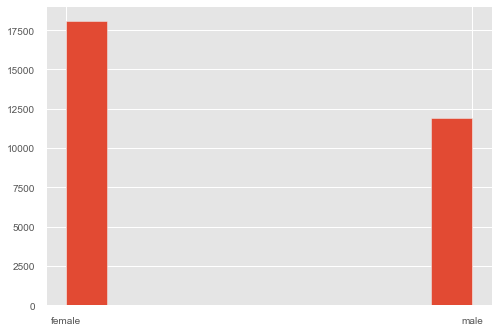

In [33]:
plt.hist(credit['SEX'])

###### Draw a catplot to check how many male/female customers default on payments 
###### We can see that a higher percentage of male customers default compared to females.

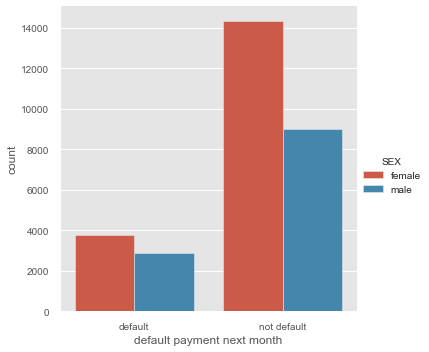

In [34]:
fg = sns.catplot('default payment next month', data = credit, hue = 'SEX', kind = 'count')

###### Create a crosstab of percentages for default behaviour across gender

In [35]:
pd.crosstab(index = credit['default payment next month'], 
            columns = credit['SEX'],
            normalize = 'columns').applymap(lambda x: "{0:.2f}%".format(100*x))

SEX,female,male
default payment next month,,
default,20.78%,24.17%
not default,79.22%,75.83%


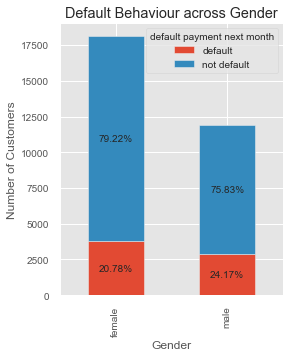

In [36]:
# plot a stacked chart to break up payment default info across gender.
plt.style.use('ggplot')                                                          
edu_stack_plot = credit.groupby(['SEX','default payment next month'])['ID'].count().unstack('default payment next month')
ax = edu_stack_plot.plot(kind = 'bar', 
                          stacked = True, 
                          title = 'Default Behaviour across Gender', 
                          figsize = (4, 5))
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Customers')


#create a varray to house the total height of each of the 4 bars
# this will be used to calculate the height % to display in each of the patches
tot = [0, 0]

# calculate the total height of each of the 2 bars
for i, p in enumerate(ax.patches):
    if i % 2 == 0 :
        tot[0] = tot[0] +  p.get_height()
    elif i % 2 == 1 :
        tot[1] = tot[1] +  p.get_height()

# now annotate each patch with the percentage of transactions
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    px, py = p.get_x(), p.get_y()
    
    #calculate height percentage of each patch
    if i % 2 == 0 :
        ht_pct = round((p.get_height()/tot[0]), 4)
    elif i % 2 == 1 :
        ht_pct = round((p.get_height()/tot[1]), 4)

    ax.text(px+width/2, 
            py+height/2,
            "{:.2%}".format(ht_pct),
            horizontalalignment='center', 
            verticalalignment='center')

#### Feature: EDUCATION

###### Plot a histogram

(array([14030.,     0.,     0., 10585.,     0.,     0.,  4917.,     0.,
            0.,   468.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

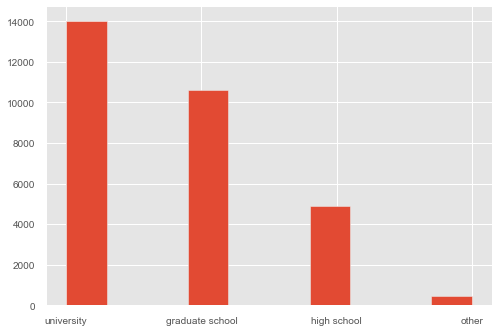

In [37]:
plt.hist(credit['EDUCATION'])

###### what are the counts of defaults across education?

In [38]:
credit.groupby(['EDUCATION','default payment next month'])['ID'].count()

EDUCATION        default payment next month
graduate school  default                        2036
                 not default                    8549
high school      default                        1237
                 not default                    3680
other            default                          33
                 not default                     435
university       default                        3330
                 not default                   10700
Name: ID, dtype: int64

###### Create a Pivot Table

In [39]:
# depict the same information in a Pivot table
credit.pivot_table(index = 'default payment next month', 
                   columns = 'EDUCATION', 
                   values = 'ID', 
                   aggfunc = 'count',
                   margins = True)

EDUCATION,graduate school,high school,other,university,All
default payment next month,,,,,
default,2036,1237,33,3330,6636
not default,8549,3680,435,10700,23364
All,10585,4917,468,14030,30000


###### Create a stacked bar chart with percentages annotated to check defaults across education levels. The chart shows that chances of defaulting reduce as education level increases, assuming education level as : high school, university and graduate school. Note: I am ignoring other here

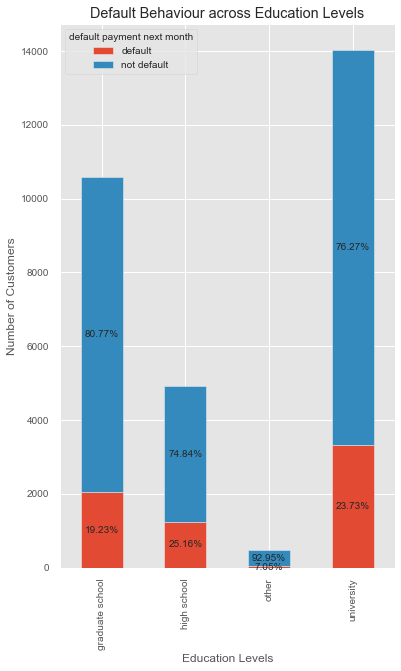

In [40]:
# plot a stacked chart to break up payment default info across education levels.
plt.style.use('ggplot')                                                          
edu_stack_plot = credit.groupby(['EDUCATION','default payment next month'])['ID'].count().unstack('default payment next month')
ax = edu_stack_plot.plot(kind = 'bar', 
                          stacked = True, 
                          title = 'Default Behaviour across Education Levels', 
                          figsize = (6, 10))
ax.set_xlabel('Education Levels')
ax.set_ylabel('Number of Customers')


#create a varray to house the total height of each of the 4 bars
# this will be used to calculate the height % to display in each of the patches
tot = [0, 0, 0, 0]

# calculate the total height of each of the 4 bars
for i, p in enumerate(ax.patches):
    if i % 4 == 0 :
        tot[0] = tot[0] +  p.get_height()
    elif i % 4 == 1 :
        tot[1] = tot[1] +  p.get_height()
    elif i % 4 == 2 :
        tot[2] = tot[2] +  p.get_height()
    elif i % 4 == 3 :
        tot[3] = tot[3] +  p.get_height()

# now annotate each patch with the percentage of transactions
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    px, py = p.get_x(), p.get_y()
    
    #calculate height percentage of each patch
    if i % 4 == 0 :
        ht_pct = round((p.get_height()/tot[0]), 4)
    elif i % 4 == 1 :
        ht_pct = round((p.get_height()/tot[1]), 4)
    elif i % 4 == 2 :
        ht_pct = round((p.get_height()/tot[2]), 4)
    elif i % 4 == 3 :
        ht_pct = round((p.get_height()/tot[3]), 4)

    ax.text(px+width/2, 
            py+height/2,
            "{:.2%}".format(ht_pct),
            horizontalalignment='center', 
            verticalalignment='center')

In [41]:
# create a crosstab to see a tabular version of the same information
pd.crosstab(index = credit['default payment next month'], 
            columns = credit['EDUCATION'],
            normalize = 'columns').applymap(lambda x: "{0:.2f}%".format(100*x))

EDUCATION,graduate school,high school,other,university
default payment next month,,,,
default,19.23%,25.16%,7.05%,23.73%
not default,80.77%,74.84%,92.95%,76.27%


#### Feature: MARRIAGE

###### Plot a histogram first to check distribution of marital status across customers

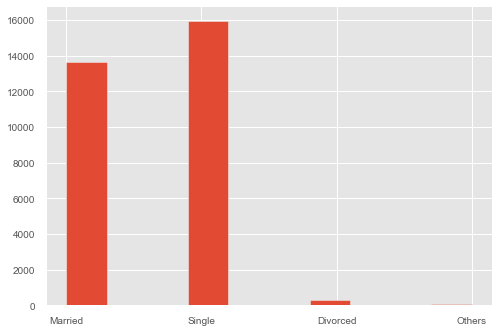

In [42]:
credit['MARRIAGE_LABEL'].hist()

###### Stacked bar chart for default behaviour across Marital status. Seems married customers a more likely to default than single. 

Text(0, 0.5, 'Marital Status Levels')

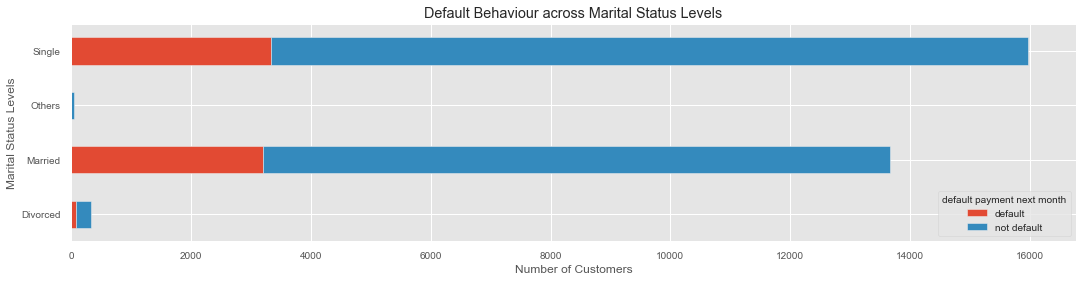

In [43]:
# Plot a stacked bar chart to see default behaviour across marital status
marr_stack_plot = credit.groupby(['MARRIAGE_LABEL','default payment next month'])['ID'].count().unstack('default payment next month')
ax = marr_stack_plot.plot(kind = 'barh', 
                          stacked = True, 
                          title = 'Default Behaviour across Marital Status Levels', 
                          figsize = (18, 4))
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Marital Status Levels')

###### Is there any pattern for defaulting across marital status and education. Create a crosstab table to see percentages of default across marriage status? The normalize parameter helps us see percentages in the decimal form. Ffrom the crosstab below, divorced customers are more likely to default than married customers.

In [44]:
pd.crosstab(index = credit['default payment next month'], 
            columns = credit['MARRIAGE_LABEL'],
            normalize = 'columns').applymap(lambda x: "{0:.2f}%".format(100*x))

MARRIAGE_LABEL,Divorced,Married,Others,Single
default payment next month,,,,
default,26.01%,23.47%,9.26%,20.93%
not default,73.99%,76.53%,90.74%,79.07%


###### Break up the cross tab further at education level and see if there are additional insights

In [45]:
pd.crosstab(index = credit['default payment next month'], 
            columns = [credit['MARRIAGE_LABEL'], credit['EDUCATION']],
            normalize = 'columns')

MARRIAGE_LABEL                    Divorced                               \
EDUCATION                  graduate school high school other university   
default payment next month                                                
default                               0.26    0.262136   0.0   0.271605   
not default                           0.74    0.737864   1.0   0.728395   

MARRIAGE_LABEL                     Married                                  \
EDUCATION                  graduate school high school    other university   
default payment next month                                                   
default                           0.206609    0.263544  0.07265   0.243496   
not default                       0.793391    0.736456  0.92735   0.756504   

MARRIAGE_LABEL                      Others                         \
EDUCATION                  graduate school high school university   
default payment next month                                          
default                                0.0    0.090909   0.166667   
not default                            1.0    0.909091   0.833333   

MARRIAGE_LABEL                      Single                                   
EDUCATION                  graduate school high school     other university  
default payment next month                                                   
default                           0.184168    0.236773  0.070796   0.230627  
not default                       0.815832    0.763227  0.929204   0.769373

#### Feature: AGE

###### What are the min, max, mean values

In [46]:
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

###### Histogram for age

(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <a list of 10 Patch objects>)

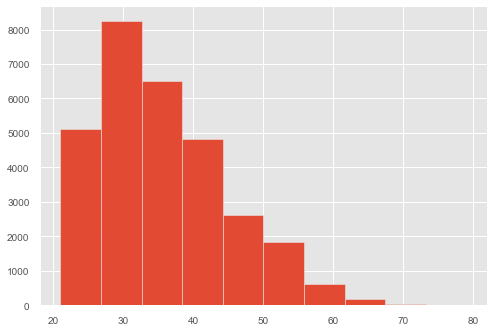

In [47]:
# plot a histogram of the age
plt.hist(credit['AGE'])

###### Scatter plot of age vs balance, to see if ther eare any patterns. None seen

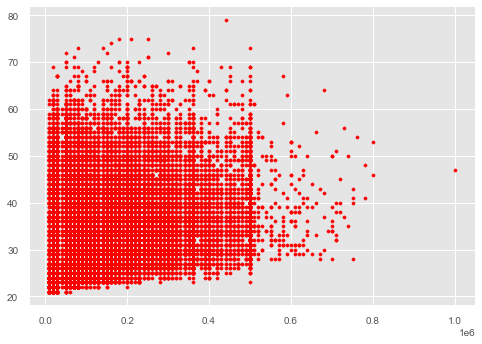

In [48]:
# draw a scatter plot to check the balance distribution across ages
plt.scatter(credit['LIMIT_BAL'], credit['AGE'], s = 10, c = 'red', marker = 'o')

###### Box Plot of age vs default behaviout to see if there are any patterns. No useful patterns

[Text(0.5, 1.0, 'Box Plot to show Relationship between Age and Payment Default')]

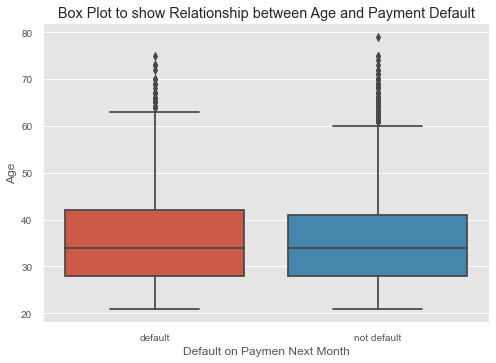

In [49]:
# plot boxplot for age vs default pmt
fg = sns.boxplot(credit['default payment next month'], credit['AGE'])
fg.set(xlabel = 'Default on Paymen Next Month', ylabel = 'Age')
fg.set (title = 'Box Plot to show Relationship between Age and Payment Default')

###### What is distribution of age across customers

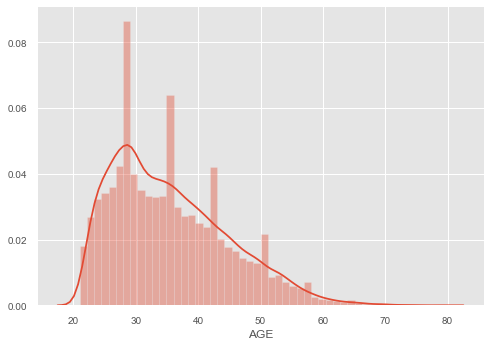

In [50]:
sns.distplot(credit['AGE'])

###### what is the distribution of age across the two genders - the plot below shows a fairly equal distribution of age across sexes.

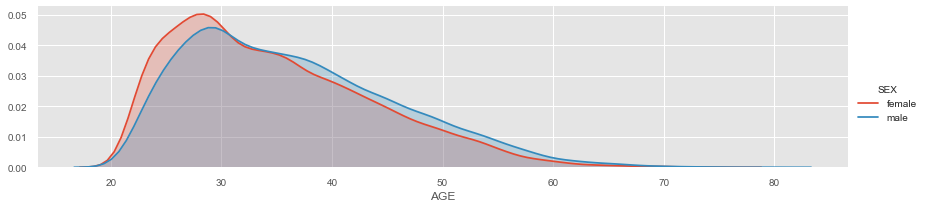

In [51]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
fig.add_legend()

###### Stacked bar chart for default behaviour across Age Group Bins. 

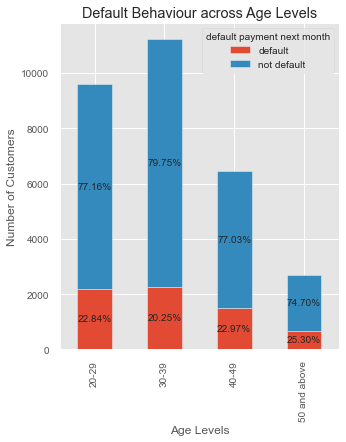

In [52]:
# Plot a stacked bar chart to see default behaviour across marital status
marr_stack_plot = credit.groupby(['age_bins','default payment next month'])['ID'].count().unstack('default payment next month')
ax = marr_stack_plot.plot(kind = 'bar', 
                          stacked = True, 
                          title = 'Default Behaviour across Age Levels', 
                          figsize = (5, 6))
ax.set_xlabel('Age Levels')
ax.set_ylabel('Number of Customers')

#create a varray to house the total height of each of the 4 bars
# this will be used to calculate the height % to display in each of the patches
tot = [0, 0, 0, 0]

# calculate the total height of each of the 4 bars
for i, p in enumerate(ax.patches):
    if i % 4 == 0 :
        tot[0] = tot[0] +  p.get_height()
    elif i % 4 == 1 :
        tot[1] = tot[1] +  p.get_height()
    elif i % 4 == 2 :
        tot[2] = tot[2] +  p.get_height()
    elif i % 4 == 3 :
        tot[3] = tot[3] +  p.get_height()

# now annotate each patch with the percentage of transactions
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    px, py = p.get_x(), p.get_y()
    
    #calculate height percentage of each patch
    if i % 4 == 0 :
        ht_pct = round((p.get_height()/tot[0]), 4)
    elif i % 4 == 1 :
        ht_pct = round((p.get_height()/tot[1]), 4)
    elif i % 4 == 2 :
        ht_pct = round((p.get_height()/tot[2]), 4)
    elif i % 4 == 3 :
        ht_pct = round((p.get_height()/tot[3]), 4)

    ax.text(px+width/2, 
            py+height/2,
            "{:.2%}".format(ht_pct),
            horizontalalignment='center', 
            verticalalignment='center')

###### Create a crosstab table to see percentages of default across age groups. The normalize parameter helps us see percentages in the decimal form. From the crosstab below, customers 50 and above are more likely to default than other age groups.

In [53]:
pd.crosstab(index = credit['default payment next month'], 
            columns = credit['age_bins'],
            normalize = 'columns')

age_bins,20-29,30-39,40-49,50 and above
default payment next month,,,,
default,0.228426,0.202527,0.229734,0.252985
not default,0.771574,0.797473,0.770266,0.747015


#### Feature: PAY_0 to PAY_6

In [54]:
# what are the distinct values of PAY_0
credit['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [55]:
# what are the distinct values of PAY_2
credit['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [56]:
# what are the distinct values of PAY_3
credit['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [57]:
# what are the distinct values of PAY_4
credit['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64

In [58]:
# what are the distinct values of PAY_5
credit['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [59]:
# what are the distinct values of PAY_6
credit['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

###### Is there any correlation between PAY_0 through PAY_6 values. One would expect to see a correlation. All of them have a fairly good correlation between each other

In [60]:
credit.corr().iloc[4:10, 4:10]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
PAY_0,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553
PAY_2,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501
PAY_3,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684
PAY_4,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449
PAY_5,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900
PAY_6,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000


###### Plot a Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

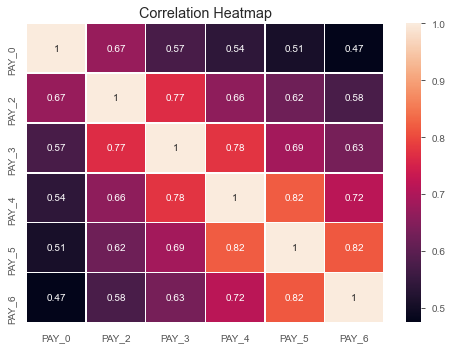

In [61]:
sns.heatmap(credit.corr().iloc[4:10, 4:10], linewidths = .5, annot = True)
plt.title('Correlation Heatmap')

###### Draw a catplot to check distribution of PAY_0 across payment default. It shows that customers who default the most are those with revolving credit, or those with 1-3 months behind on their payments

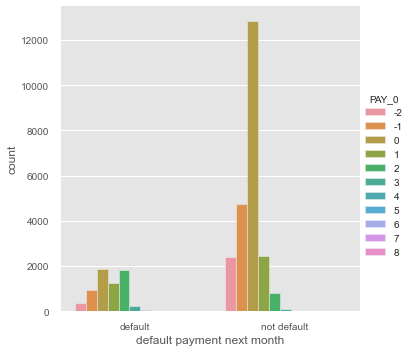

In [62]:
fg = sns.catplot('default payment next month', data = credit, hue = 'PAY_0', kind = 'count')

###### Draw a catplot to check distribution of PAY_2 across payment default. It shows that customers who default the most next month are those with revolving credit, or those with 1-3 months behind on their payments

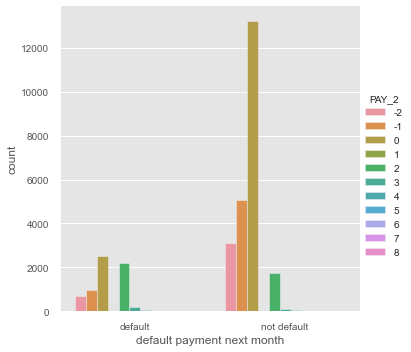

In [63]:
fg = sns.catplot('default payment next month', data = credit, hue = 'PAY_2', kind = 'count')

###### Create a crosstab to see percentages of default next month if customer has defaulted in first month. We can see that if a customer has defaulted in the first month, there is a 50% chance they will default next month(dependent variable)

In [64]:
t1 = pd.crosstab(index = credit['default payment next month'], 
            columns = credit['PAY_0_default'],
            normalize = 'columns').applymap(lambda x: "{0:.2f}%".format(100*x))
t1.columns=['PAY_0_not_default', 'PAY_0_default']
t1

,PAY_0_not_default,PAY_0_default
default payment next month,,
default,13.83%,50.29%
not default,86.17%,49.71%


###### Create a crosstab to see percentages of default next month if customer has defaulted in second month. We can see that if a customer has defaulted in the second month, there is a 55% chance they will default next month

In [65]:
t2 = pd.crosstab(index = credit['default payment next month'], 
            columns = credit['PAY_2_default'],
            normalize = 'columns').applymap(lambda x: "{0:.2f}%".format(100*x))
t2.columns=['PAY_2_not_default', 'PAY_2_default']
t2

,PAY_2_not_default,PAY_2_default
default payment next month,,
default,16.27%,55.79%
not default,83.73%,44.21%


###### Create a crosstab to see percentages of default next month if customer has defaulted in third month. We can see that if a customer has defaulted in the third month, there is a 52% chance they will default next month

In [66]:
t3 = pd.crosstab(index = credit['default payment next month'], 
            columns = credit['PAY_3_default'],
            normalize = 'columns').applymap(lambda x: "{0:.2f}%".format(100*x))
t3.columns=['PAY_3_not_default', 'PAY_3_default']
t3

,PAY_3_not_default,PAY_3_default
default payment next month,,
default,17.19%,52.27%
not default,82.81%,47.73%


###### Create a crosstab to see percentages of default next month if customer has defaulted in fourth month. We can see that if a customer has defaulted in the fourth month, there is a 54% chance they will default next month

In [67]:
t4 = pd.crosstab(index = credit['default payment next month'], 
            columns = credit['PAY_4_default'],
            normalize = 'columns').applymap(lambda x: "{0:.2f}%".format(100*x))
t4.columns=['PAY_4_not_default', 'PAY_4_default']
t4

,PAY_4_not_default,PAY_4_default
default payment next month,,
default,17.96%,53.53%
not default,82.04%,46.47%


###### Create a crosstab to see percentages of default next month if customer has defaulted in fifth month. We can see that if a customer has defaulted in the fifth month, there is a 56% chance they will default next month

In [68]:
t5 = pd.crosstab(index = credit['default payment next month'], 
            columns = credit['PAY_5_default'],
            normalize = 'columns').applymap(lambda x: "{0:.2f}%".format(100*x))
t5.columns=['PAY_5_not_default', 'PAY_5_default']
t5

,PAY_5_not_default,PAY_5_default
default payment next month,,
default,18.45%,55.56%
not default,81.55%,44.44%


###### Create a crosstab to see percentages of default next month if customer has defaulted in sixth month. We can see that if a customer has defaulted in the sixth month, there is a 52% chance they will default next month

In [69]:
t6 = pd.crosstab(index = credit['default payment next month'], 
            columns = credit['PAY_6_default'],
            normalize = 'columns').applymap(lambda x: "{0:.2f}%".format(100*x))
t6.columns=['PAY_6_not_default', 'PAY_6_default']
t6

,PAY_6_not_default,PAY_6_default
default payment next month,,
default,18.67%,52.32%
not default,81.33%,47.68%


In [70]:
# concatenate all these tables to see PAY_0 through PAY_6 together across default/not default
t = pd.concat([t1, t2, t3, t4, t5, t6], axis=1)
t

,PAY_0_not_default,PAY_0_default,PAY_2_not_default,PAY_2_default,PAY_3_not_default,PAY_3_default,PAY_4_not_default,PAY_4_default,PAY_5_not_default,PAY_5_default,PAY_6_not_default,PAY_6_default
default payment next month,,,,,,,,,,,,
default,13.83%,50.29%,16.27%,55.79%,17.19%,52.27%,17.96%,53.53%,18.45%,55.56%,18.67%,52.32%
not default,86.17%,49.71%,83.73%,44.21%,82.81%,47.73%,82.04%,46.47%,81.55%,44.44%,81.33%,47.68%


#### Feature: BILL_AMT1 to BILL_AMT6

###### Plot a histogram for bill_amt1

(array([2.0000e+00, 2.1885e+04, 6.0070e+03, 1.5340e+03, 3.9700e+02,
        1.4300e+02, 2.7000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-165580. ,  -52570.9,   60438.2,  173447.3,  286456.4,  399465.5,
         512474.6,  625483.7,  738492.8,  851501.9,  964511. ]),
 <a list of 10 Patch objects>)

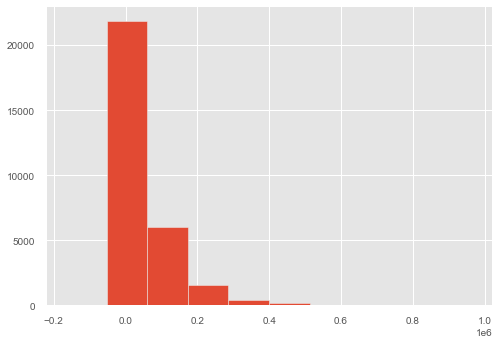

In [71]:
plt.hist(credit['BILL_AMT1'])

###### Plot a histogram for bill_amt2

(array([1.8123e+04, 9.0400e+03, 2.0380e+03, 5.3400e+02, 1.9000e+02,
        6.2000e+01, 1.0000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-69777. ,  35593.8, 140964.6, 246335.4, 351706.2, 457077. ,
        562447.8, 667818.6, 773189.4, 878560.2, 983931. ]),
 <a list of 10 Patch objects>)

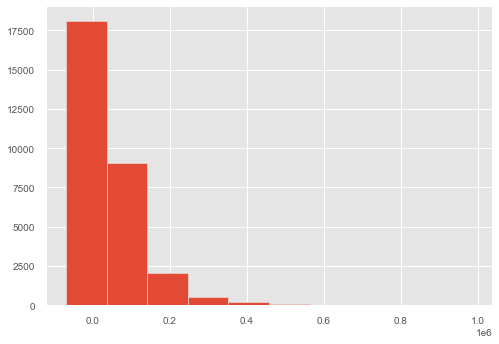

In [72]:
plt.hist(credit['BILL_AMT2'])

###### Plot a histogram for bill_amt3

(array([1.6188e+04, 1.2676e+04, 9.8500e+02, 1.4000e+02, 9.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-157264. ,   24871.3,  207006.6,  389141.9,  571277.2,  753412.5,
         935547.8, 1117683.1, 1299818.4, 1481953.7, 1664089. ]),
 <a list of 10 Patch objects>)

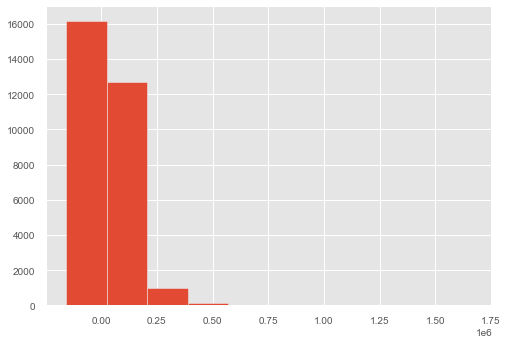

In [73]:
plt.hist(credit['BILL_AMT3'])

###### Is there any correlation between BILL_AMT_0 through BILL_AMT_6 values. The correlation matrix reveals a high correlation between each other

In [74]:
credit.corr().iloc[10:16, 10:16]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
BILL_AMT1,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650
BILL_AMT2,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594
BILL_AMT3,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320
BILL_AMT4,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941
BILL_AMT5,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197
BILL_AMT6,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000


###### Plot a Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

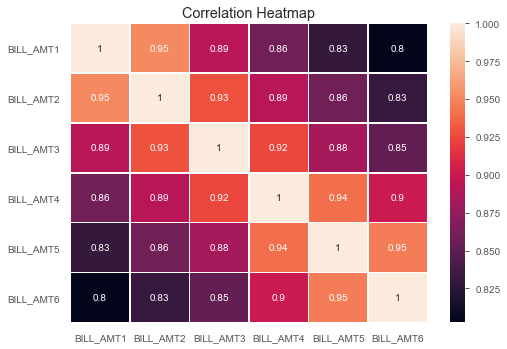

In [75]:
sns.heatmap(credit.corr().iloc[10:16, 10:16], linewidths = .5, annot = True)
plt.title('Correlation Heatmap')

#### Feature: PAY_AMT1 to PAY_AMT6

###### Plot a histogram for pay_amt1

(array([2.9802e+04, 1.4200e+02, 4.1000e+01, 9.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0. ,  87355.2, 174710.4, 262065.6, 349420.8, 436776. ,
        524131.2, 611486.4, 698841.6, 786196.8, 873552. ]),
 <a list of 10 Patch objects>)

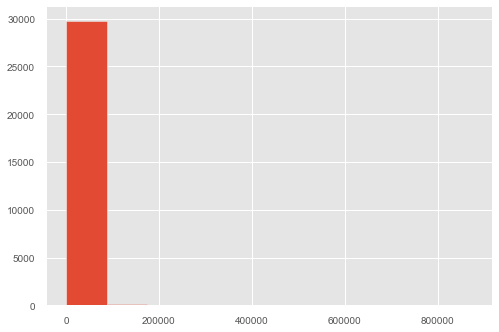

In [76]:
plt.hist(credit['PAY_AMT1'])

###### Plot a histogram for pay_amt2

(array([2.992e+04, 6.400e+01, 1.100e+01, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([      0. ,  168425.9,  336851.8,  505277.7,  673703.6,  842129.5,
        1010555.4, 1178981.3, 1347407.2, 1515833.1, 1684259. ]),
 <a list of 10 Patch objects>)

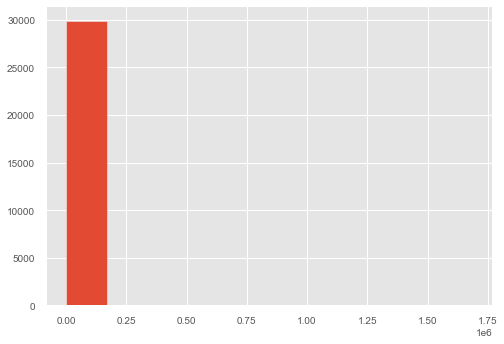

In [77]:
plt.hist(credit['PAY_AMT2'])

###### Plot a histogram for pay_amt3

(array([2.9779e+04, 1.7200e+02, 2.9000e+01, 1.2000e+01, 5.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([     0.,  89604., 179208., 268812., 358416., 448020., 537624.,
        627228., 716832., 806436., 896040.]),
 <a list of 10 Patch objects>)

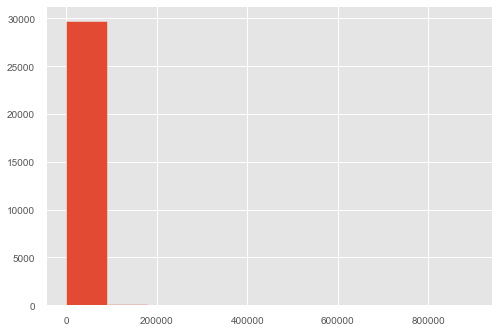

In [78]:
plt.hist(credit['PAY_AMT3'])

###### Is there any correlation between PAY_AMT_0 through PAY_AMT_6 values. The correlation matrix reveals a low correlation between each other

In [79]:
credit.corr().iloc[16:22, 16:22]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
PAY_AMT1,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
PAY_AMT3,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740
PAY_AMT4,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834
PAY_AMT5,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896
PAY_AMT6,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000


###### Plot a Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

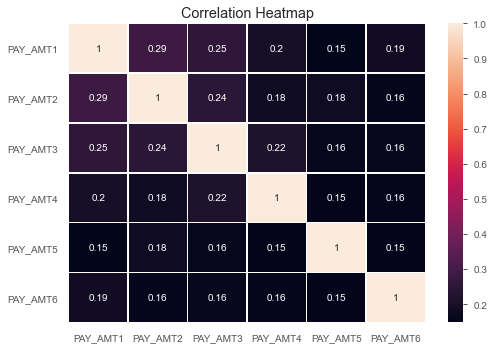

In [80]:
sns.heatmap(credit.corr().iloc[16:22, 16:22], linewidths = .5, annot = True)
plt.title('Correlation Heatmap')

#### Feature: BILL_AMT1 and PAY_AMT1

###### Get the min/max/mean for each feature

In [81]:
credit.BILL_AMT1.describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

In [82]:
credit.PAY_AMT1.describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

###### draw a line plot to compare  bill_amt1 against pay_amt1 to see how much a customer is billed and how much is paid

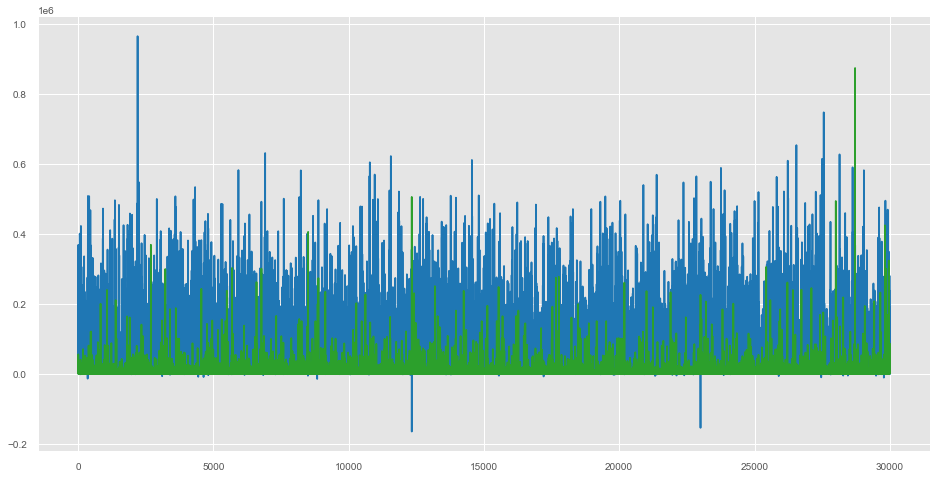

In [83]:
# draw a line plot 
plt.figure( figsize = (16, 8))
plt.plot(credit['ID'], credit['BILL_AMT1'], color='tab:blue')
plt.plot(credit['ID'], credit['PAY_AMT1'], color='tab:green')

#### Feature: default payment next month - dependant variable

###### Plot a histogram

(array([ 6636.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 23364.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

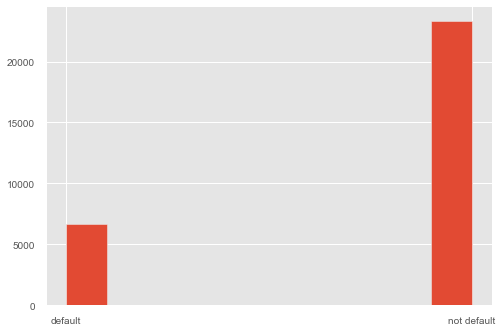

In [84]:
plt.hist(credit['default payment next month'])

###### What is the default percentage

In [85]:
credit['default payment next month'].value_counts()/30000 * 100

not default    77.88
default        22.12
Name: default payment next month, dtype: float64

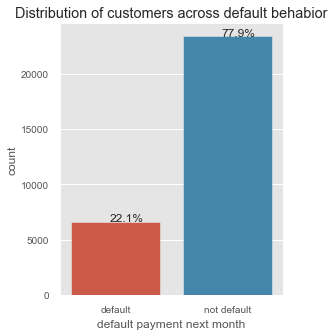

In [117]:
plt.figure(figsize=(4,5))
fg = sns.countplot('default payment next month', data=credit)
fg.set_title ('Distribution of customers across default behabior')
total = len(credit['default payment next month'])

for p in fg.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    fg.annotate(percentage, (x, y), size = 12)

###### Since the EDA on Gender, Marital status and Education reveals that female customers are less likely to default that male customers, single customers are less likely to default that married or divorced customers, and customers with graduate education level are less likely to default that other education levels, examine the data for single female graduates, and conversely for divorced males with high-school education to see what default behavior looks across these two demographic groups

In [99]:
# create a dataframe of single female graduates only, to examine default behavior for them
credit_f = credit[(credit['SEX'] == 'female') 
                  & (credit['EDUCATION'] == 'graduate school')                  
                  & (credit['MARRIAGE_LABEL'] == 'Single')]
len(credit_f)

4176

In [104]:
credit_f.isnull().any().sum()

0

In [106]:
# what is the default behavior on this dataset?
credit_f['default payment next month'].value_counts()/len(credit_f) * 100

not default    82.088123
default        17.911877
Name: default payment next month, dtype: float64

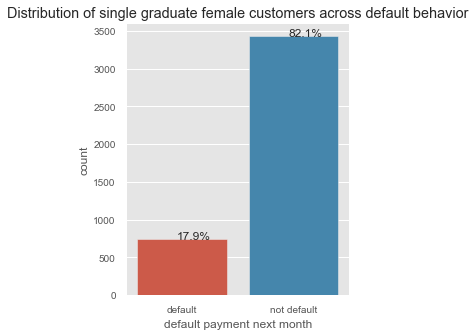

In [126]:
plt.figure(figsize=(4,5))
fg = sns.countplot('default payment next month', data=credit_f)
fg.set_title ('Distribution of single graduate female customers across default behavior')
total = len(credit_f['default payment next month'])
for p in fg.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    fg.annotate(percentage, (x, y), size = 12)

In [122]:
# create a dataframe of married or divorced males with high-school education only, to examine default behavior for them
credit_m = credit[(credit['SEX'] == 'male') 
                  & (credit['EDUCATION'] == 'high school')                  
                  & ((credit['MARRIAGE_LABEL'] == 'Married') | (credit['MARRIAGE_LABEL'] == 'Divorced')) ]
len(credit_m)

1084

In [123]:
credit_m.isnull().any().sum()

0

In [124]:
# what is the default behavior on this dataset?
credit_m['default payment next month'].value_counts()/len(credit_m) * 100

not default    71.03321
default        28.96679
Name: default payment next month, dtype: float64

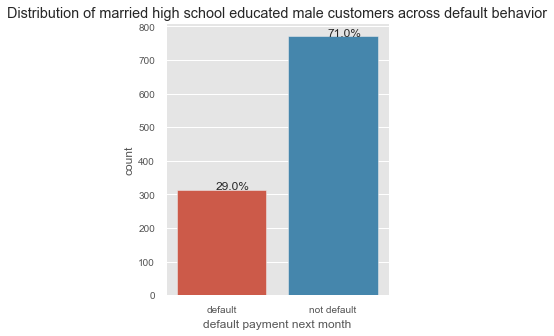

In [128]:
plt.figure(figsize=(4,5))
fg = sns.countplot('default payment next month', data=credit_m)
fg.set_title ('Distribution of married high school educated male customers across default behavior')
total = len(credit_m['default payment next month'])
for p in fg.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    fg.annotate(percentage, (x, y), size = 12)

## Important Findings

#### 1. Higher balances have a lower chance of defaulting

#### 2. A higher percentage of male customers default compared to female customers

#### 3. Customers with graduate school education level default the least, followed by university graduates, followed by highschool graduates - who default the highest. The data reveals -  higher the education level, lower the chance of defaulting.

#### 4. Divorced customers are most likely to default followed by married customers followed by single customers

#### 5. Customers above 50 years of age are more likely to default than other age groups

#### 6. Customers who default the most are those with revolving credit, or those with 1-3 months behind on their payments

#### 7. There is a fairly good correlation between each of the different PAY_0 to PAY 6 features (between .47 to .82)

#### 8. There is a high correlation between the various BILL_AMT1 to BILL_AMT6, (between .83 to .95) If one goes up, the other does too. This indicates that the bill amount for a customer across 6 months remains more or less the same

#### 9. Overall about 22.12% of the customers default in next month's payment

#### 10. Single female customers with graduate level education seem to default much less compared to married or divorced male customers with a high school education level.